In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# College Scoreboard Data

### About: 
"The College Scorecard project is designed to increase transparency, putting the power in the hands of students and families to compare how well individual postsecondary institutions are preparing their students to be successful. This project provides data to help students and families compare college costs and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and educational goals."

Documentation for this notebook:
https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf

## Importing Multiple CSV files into one DataFrame

"Python <b>os module</b> provides methods that help you perform file-processing operations, such as renaming and deleting files. The os module has several methods that help you create, remove, and change directories.

The method <b>listdir()</b> returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order. It does not include the special entries '.' and '..' even if they are present in the directory."

LINK: https://www.tutorialspoint.com/python/os_listdir.htm

In [9]:
#creates a list of the files in that path
filelist = os.listdir("CollegeScorecard_Raw_Data") 

#creates an empty df and list
big_df = pd.DataFrame()
lst = []

#loop through loop of lists and create a df for each file
for file in filelist[2:]:
    temp_df = pd.read_csv("CollegeScorecard_Raw_Data/" + file, index_col=None, header=0)
    #append each df to the list we created above
    lst.append(temp_df)

#Concatenate pandas objects along a particular axis(default = 0)
big_df = pd.concat(lst)

#return the last 5 rows
big_df.tail()

/Users/melodywong/Crimson12/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/melodywong/Crimson12/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,6,1408,1431,1432,1433,1475,1489,1537,1538,1539,1540,1542,1603,1606,1610,1611,1614,1615,1616,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/melodywong/Crimson12/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,1447,1537,1540,1542,1606,1614,1615) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/melodywong/Crimson12/lib/python3.6/site-packages/IPython/core/interactiveshe

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
7698,48065701,869423,8694,Rasmussen College - Overland Park,Overland Park,KS,662102786,North Central Association of Colleges and Scho...,rasmussen.edu,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,12321.0,NaN
7699,48154401,4220901,42209,National Personal Training Institute of Cleveland,Highland Heights,OH,44143,Accrediting Council for Continuing Education &...,nptiohio.edu,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
7700,48387801,4223701,42237,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,951131820,Accrediting Council for Independent Colleges a...,www.bamasf.com/,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
7701,48400201,4228101,42281,High Desert Medical College,Lancaster,CA,935340000,Accrediting Council for Continuing Education &...,www.highdesertmedicalcollege.org/,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
7702,48414501,4232401,42324,Excel Learning Center-San Antonio South,San Antonio,TX,782211361,Council on Occupational Education,www.excel.edu,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


### How big is the file? 

In [10]:
# get the shape of the big_df
big_df.shape

(73075, 1743)

Although, you are entirely free to work on a big dataset on your own project. For the sake of time (running the cells) we will only be working with one of the csv files in this notebook.

## Create a new DataFrame using the data from the most recent CSV file

In [11]:
df = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv")
df.head()

/Users/melodywong/Crimson12/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,9,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1425,1427,1503,1517,1529,1530,1532,1537,1540,1541,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1605,1606,1609,1610,1613,1614,1615,1725,1726,1727,1728,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,NaN,0.0000,1044.0,NaN,NaN,1,0.4831,0.5169,1895.0,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,NaN,0.2408,1246.0,NaN,NaN,1,0.4169,0.5831,3937.0,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,0.0000,9.0,NaN,NaN,1,0.3986,0.6014,344.0,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,0.3477,765.0,NaN,NaN,1,0.5733,0.4267,1513.0,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,0.0000,1330.0,NaN,NaN,1,0.3877,0.6123,2137.0,NaN


## What is that error we are getting? Should we worry about it? Will it affect our data?

The warning message tells us that there are columns within our dataframe that have different value data types. 
<br><br>
<font color = "red"> <b>Why could this be a problem? </b> </font> 

### Check the data types in your column according to the columns listed above

"A <b>set</b> is an unordered collection of items. Every element is unique (no duplicates) and must be immutable (which cannot be changed). However, the set itself is mutable. We can add or remove items from it."

LINK: https://www.programiz.com/python-programming/set

In [12]:
#iloc = purely integer-location based indexing for selection by position.
df.iloc[:,[6]].head()

,ZIP
0,35762
1,35294-0110
2,36117-3553
3,35899
4,36104-0271


In [13]:
set([type(i) for i in df.iloc[:,6]])

{str, int}

The error above tells us that there are integers and strings in our 6th column. For this example, the data types do not matter as much because the ZIP takes numerical values, but are not quantitative. Therefore, we will not be making calculations with them in the future. To consistently be able to take these values in and because we are confident that we know their value type we could convert their data type to something else, in this case a string because we will not be doing calculations with the ZIP.

In [14]:
#Convert all the values in column 6 to strings
df.iloc[:,6] = [str(i) for i in df.iloc[:,6]]

In [15]:
#Check the data types in column 6
set([type(i) for i in df.iloc[:,6]])

{str}

### What is the size/shape of this DF?

In [16]:
df.shape ## (len(df),len(columns)) same

(7703, 1743)

# What visualizations should I use for my data?
Categorical variables =  discrete or qualitative variables 
<ul>
"<b>Nominal variables</b> are variables that have two or more categories, but which do not have an intrinsic order. For example, a real estate agent could classify their types of property into distinct categories such as houses, condos, co-ops or bungalows. So "type of property" is a nominal variable with 4 categories called houses, condos, co-ops and bungalows. Of note, the different categories of a nominal variable can also be referred to as groups or levels of the nominal variable. Another example of a nominal variable would be classifying where people live in the USA by state. In this case there will be many more levels of the nominal variable (50 in fact).<br><br>
<b>Ordinal variables</b> are variables that have two or more categories just like nominal variables only the categories can also be ordered or ranked. So if you asked someone if they liked the policies of the Democratic Party and they could answer either "Not very much", "They are OK" or "Yes, a lot" then you have an ordinal variable. Why? Because you have 3 categories, namely "Not very much", "They are OK" and "Yes, a lot" and you can rank them from the most positive (Yes, a lot), to the middle response (They are OK), to the least positive (Not very much). However, whilst we can rank the levels, we cannot place a "value" to them; we cannot say that "They are OK" is twice as positive as "Not very much" for example."</ul>

LINK: https://statistics.laerd.com/statistical-guides/types-of-variable.php



<b>Univariate = 1 variable</b>
<img src = "Univariate Displays.png" width = 60% height = 60% >

<b>Bivariate = 2 variables</b>
<img src = "Bivariate Displays.png" width = 70% height = 70% >

## Let's start with something simple to refresh your MatPlotLib skills

Create a bar chart comparing the difference between men and women. Make sure to add the labels to your x and y axis. Also, include a title.

HINT1: Do not use count or sum when calculating the amount of women/men.<br>
HINT2: create a sub-DataFrame that only includes the gender, call in gender<br>
HINT3: Drop null values

In [17]:
gender = df.filter(['UGDS_MEN','UGDS_WOMEN'], axis = 1)
gender.head()

,UGDS_MEN,UGDS_WOMEN
0,0.4831,0.5169
1,0.4169,0.5831
2,0.3986,0.6014
3,0.5733,0.4267
4,0.3877,0.6123


In [18]:
gender = gender.dropna(axis = 0, how = "any")
gender.isnull().sum()
gender.head()

,UGDS_MEN,UGDS_WOMEN
0,0.4831,0.5169
1,0.4169,0.5831
2,0.3986,0.6014
3,0.5733,0.4267
4,0.3877,0.6123


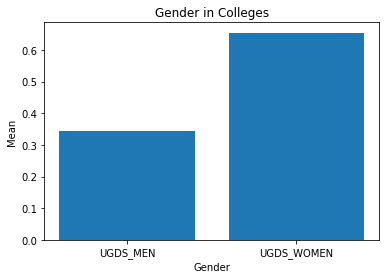

In [19]:
x = gender.columns
x_pos = range(len(x))
y = [gender.UGDS_MEN.mean(),gender.UGDS_WOMEN.mean()]
plt.bar (x_pos,y)
plt.xticks (x_pos,x)
plt.xlabel("Gender")
plt.ylabel("Mean")
plt.title("Gender in Colleges")
plt.show()

## *Now let's create a bar chart for the Race Information they provided.

Instead of just finding the mean number, convert your y-axis to a percentage.

<b>Column Reference:<br></b>
<ul>
White = UGDS_WHITE<br><br>
Black  = UGDS_BLACK<br><br> 
Hispanic = UGDS_HISP<br><br> 
Asian  = UGDS_ASIAN<br><br> 
American Indian/Alaska Native  = UGDS_AIAN<br><br> 
Native Hawaiian/Pacific Islander = UGDS_NHPI<br><br> 
two or more races = UGDS_2MOR<br><br> 
</ul>
HINT: Change the rotation of your xticks

In [20]:
race = df[['UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR']]
#drop all the null values
race.isnull().sum()
race.dropna(axis = 0, how = "any")
#shows the first 5 rows
race.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR
0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000
1,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368
2,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000
3,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172
4,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098


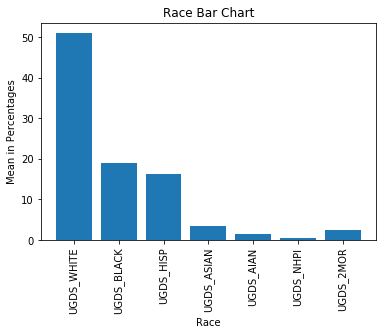

In [21]:
x = race.columns
y = [100 *race[i].mean() for i in race.columns]
x_pos = range(len(x))
#y = [(x*100) for x in [race[i].values.mean() for i in race.columns]]
plt.bar (x_pos,y)
plt.xticks (x_pos,x, rotation = 'vertical')
plt.xlabel("Race")
plt.ylabel("Mean in Percentages")
plt.title("Race Bar Chart")
plt.show()

Are these the results you were expecting? Did you want to try to look at more details in regards to race and the institution?

## HISTOGRAM

"The purpose of a <b>histogram</b> is to graphically summarize the distribution of a univariate data set.
The histogram graphically shows the following:
<ul>
center (i.e., the location) of the data;<br>
spread (i.e., the scale) of the data;<br>
skewness of the data;<br>
presence of outliers; and<br>
presence of multiple modes in the data."<br>
</ul>

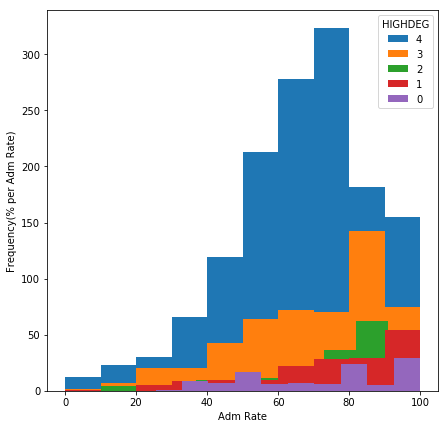

In [22]:
admit = df[["HIGHDEG","ADM_RATE_ALL"]].dropna(axis = 0, how = "any")
admit["ADM_RATE_ALL"] = [(i*100) for i in admit.ADM_RATE_ALL]

four = admit[admit["HIGHDEG"]==4]
three= admit[admit["HIGHDEG"]==3]
two = admit[admit["HIGHDEG"]==2]
one = admit[admit["HIGHDEG"]==1]
zero = admit[admit["HIGHDEG"]==0]

plt.subplots(figsize=(7, 7))
plt.hist(four.ADM_RATE_ALL, label = "4")
plt.hist(three.ADM_RATE_ALL , label = "3")
plt.hist(two.ADM_RATE_ALL, label = "2")
plt.hist(one.ADM_RATE_ALL, label = "1")
plt.hist(zero.ADM_RATE_ALL, label = "0")
plt.ylabel("Frequency(% per Adm Rate)")
plt.xlabel("Adm Rate")
plt.legend(title = "HIGHDEG")
plt.show()

In [23]:
four.head()

,HIGHDEG,ADM_RATE_ALL
0,4,52.560347
1,4,85.691769
3,4,82.034221
4,4,53.264694
5,4,51.046360


### What is the difference between a HISTOGRAM and a BAR CHART?

It is similar to a Bar Chart, but a histogram groups numbers into ranges(bins).

"So far we have mentioned three differences between histograms and bar charts: histograms are used to show distributions of variables while bar charts are used to compare variables. Histograms plot binned quantitative data while bar charts plot categorical data. Bars can be reordered in bar charts but not in histograms.

Note that there are no spaces between the bars of a histogram since there are no gaps between the bins. An exception would occur if there were no values in a given bin but in that case the value is zero rather than a space. On the other hand, there are spaces between the variables of a bar chart."

LINK: https://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart/#78ff16696d77

<img src = "BarChartVSHist.png" width = 70% height = 70% >

## Plotting Quantitative Values

In [30]:
tuition = df[["TUITIONFEE_IN","TUITIONFEE_OUT","STABBR","CITY"]].dropna(axis = 0, how = "any")
ca_tuition = tuition[tuition["STABBR"] == "CA"]
ca_tuition
#plt.plot(ca_tuition.TUITIONFEE_IN , label = "In")
#plt.plot(ca_tuition.TUITIONFEE_OUT, label = "Out")
#plt.legend()
#plt.show()

,TUITIONFEE_IN,TUITIONFEE_OUT,STABBR,CITY
192,19740.0,19740.0,CA,San Francisco
193,18048.0,18048.0,CA,Rancho Cordova
197,1144.0,6256.0,CA,Alameda
198,1346.0,6750.0,CA,Santa Maria
199,30650.0,30650.0,CA,Los Angeles
205,1104.0,7272.0,CA,Sacramento
206,1104.0,5664.0,CA,Lancaster
207,37830.0,37830.0,CA,Pasadena
210,33096.0,33096.0,CA,Azusa
211,1324.0,7120.0,CA,Bakersfield


In [28]:
ca_tuition.head()

,TUITIONFEE_IN,TUITIONFEE_OUT,STABBR,CITY
192,19740.0,19740.0,CA,San Francisco
193,18048.0,18048.0,CA,Rancho Cordova
197,1144.0,6256.0,CA,Alameda
198,1346.0,6750.0,CA,Santa Maria
199,30650.0,30650.0,CA,Los Angeles


Maybe this is too much for one graph, it's not very clear what is happening and even if we zoomed into the graph it still would not be clear. Let's focus on one location at a time.

What would happen if we try to plot every point?

In [26]:
#CA Tuition by city
ca_tuition_grouped = ca_tuition.groupby("CITY")["TUITIONFEE_IN","TUITIONFEE_OUT"].mean()
ca_tuition_grouped.head()

,TUITIONFEE_IN,TUITIONFEE_OUT
CITY,,
Alameda,7403.500000,9959.500000
Alhambra,14820.000000,14820.000000
Aliso Viejo,30214.000000,30214.000000
Anaheim,16424.666667,16424.666667
Angwin,28131.000000,28131.000000


In [1]:
#plot the tuition for in and out as two separate lines
plt.plot(x,ca_tuition_grouped.TUITIONFEE_IN , label = "In")
plt.plot(x,ca_tuition_grouped.TUITIONFEE_OUT, label = "Out")
plt.legend()
plt.ylabel("Fees")
plt.xlabel("City")
plt.show()

NameError: name 'plt' is not defined

# TIPS:
<img src = "PlottingQuantVar.png" height = 70% width = 70%>

## Is there a Linear Relationships?

"A linear equation in two variables describes a relationship in which the value of one of the variables depends on the value of the other variable. In a linear equation in x and y, x is called x is the independent variable and y depends on it. We call y the dependent variable."

Create a line plot, I have given you the x axis and the y axis should be the mean of ADM_RATE_ALL per HIGH_DEG. Add a marker to each point.
Also, make your x-axis show only the whole numbers not decimals.

In [ ]:
x = [4,3,2,1,0]
y = [four.ADM_RATE_ALL.mean(),three.ADM_RATE_ALL.mean(),two.ADM_RATE_ALL.mean(),one.ADM_RATE_ALL.mean()]
plt.plot(x,y, marker = "o")
plt.xticks(x,x)
plt.xlabel("HIGHDEG")
plt.ylabel("ADM RATE (mean)")

plt.show()

In [ ]:
#insert same code from plot about
x = [4,3,2,1,0]
y = [four.ADM_RATE_ALL.mean(),three.ADM_RATE_ALL.mean(),two.ADM_RATE_ALL.mean(),one.ADM_RATE_ALL.mean()]
plt.plot(x,y, marker ="o")
plt.xticks(x,x)
plt.xlabel("HIGHDEG")
plt.ylabel("ADM RATE (mean)")

#added a trend line that has a linear relationship
z = np.polyfit(x, y, 1)
#p is now a function which takes in x and returns an estimate for y
p = np.poly1d(z)
plt.plot(x,p(x), linestyle = "--", color = "r")

plt.show()

### Correlation Coefficients

<b>Correlation</b> coefficients are used in statistics to measure how strong a relationship is between two variables. 

In [ ]:
np.corrcoef(x,y)

Cov( X, X )    Cov( X, Y )

Cov( Y, X )    Cov( Y, Y )

<img src = "Correlation Coefficient.png" width = 50% height = 50% >

# More Advanced Visualizations
We will now look at location

In [ ]:
location = df[["LATITUDE","LONGITUDE","STABBR"]].dropna(axis=0, how = "any")
location.head()

In [ ]:
#create a DF where you group by the STATE and find the mean per state
loc = ...

loc.head()

In [ ]:
#Create a scatter plot of LONGITUDE AND LATITUDE points
...

What if we wanted to annotate each point with it's STABBR?

In [ ]:
#insert that scatter plot here
...

for label, x, y in zip(loc.index, loc.LONGITUDE, loc.LATITUDE):
    plt.annotate(label,xy = (x,y))

plt.show()

That is too small and making the axis, fig larger does not let me really look into that cluster of points I am interested in. 

### <b>How can I zoom into a portion of my plot, while still keeping the appropriate values?</b>

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import *

#original plot now with a different figure size
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(loc.LONGITUDE, loc.LATITUDE )
for label, x, y in zip(loc.index, loc.LONGITUDE, loc.LATITUDE):
    ax.annotate(label,xy = (x,y))

#created the zoomed in graph  
#3 = size of box
axins = zoomed_inset_axes(ax, 3, loc=1)
plt.scatter(loc.LONGITUDE, loc.LATITUDE)
for label, x, y in zip(loc.index,loc.LONGITUDE, loc.LATITUDE ):
    plt.annotate(label,xy = (x,y))
plt.xlim(-125, -60) 
plt.ylim(30,50)

#makes a box around the zoomed in portion and what you are selecting
#loc1 = the location of the first line(max 4)
#loc2 = the location of the second line(max 4)
mark_inset(ax, axins, loc1=3, loc2=2);


# Can you spot the difference?

<img src = "Difference Between Plots.png">

### * Keep in mind the difference amongst the size of groups you are comparing. Normalize your data